<a href="https://colab.research.google.com/github/karthikmohan1702/EVA6/blob/main/S9_CustomResnet_CycleLR/S9_Resnet_LRFinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchsummary
!pip install -U albumentations
!pip install torch-lr-finder

     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 38.2MB 77kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [2]:
# Cloning repo to get all the essentials
!git clone https://github.com/karthikmohan1702/vision_wrapper.git

Cloning into 'vision_wrapper'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 40 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [3]:
# Github Imports
# ==============
from vision_wrapper import utils
from vision_wrapper.utils import get_cifar10_dataset
from vision_wrapper import main 
from vision_wrapper.model.custom_resnet import ResNet
from torch_lr_finder import LRFinder

### Data Analysis

In [4]:
device = utils.get_device_info()

train_set = get_cifar10_dataset(root="data/", transform=transforms.ToTensor(), download=True)
test_set = get_cifar10_dataset(root='data/', train=False, transform=transforms.ToTensor(), download=True)


cuda



Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


**View the Images that are present in the dataset**

Classes present in the dataset ==>  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


   deer   truck   horse automobile airplane


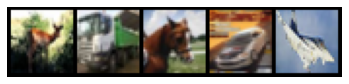

In [5]:
utils.plot_sample_img(train_set, test_set, batch_size=5)

**Size of Train & Test Dataset**


In [6]:
print("Train dataset size")
print("==="*6)
print(train_set)
print("\n")
print("Test dataset size")
print("==="*6)
print(test_set)

Train dataset size
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


Test dataset size
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()


**Mean & std deviation**

In [7]:
train_loader, test_loader = utils.train_test_loader(train_set, test_set, batch_size=512)

In [8]:
mean, std = utils.get_mean_std(train_loader)
print("\n\n","mean ==> ", mean, "\n","std ==> ", std)

100%|██████████| 98/98 [00:04<00:00, 19.72it/s]



 mean ==>  tensor([0.4914, 0.4822, 0.4465]) 
 std ==>  tensor([0.2470, 0.2435, 0.2616])


**Albumentations**

In [9]:
train_transform, test_transform = utils.albumentaion_transform(mean, std)

/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:690: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,


**Data Loader**

In [10]:
trainset= utils.get_cifar10_dataset(transform=train_transform)
testset= utils.get_cifar10_dataset(train= False, transform= test_transform)
batch_size = 512

train_loader, test_loader = utils.train_test_loader(trainset, testset, batch_size)


Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10
Files already downloaded and verified


**Summary**

In [11]:
utils.get_model_summary(model=ResNet(), input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## Learning rate 

In [12]:
import torch.optim as optim
import torch.nn as nn

param_dict = {
    "model": ResNet(),
    "train_loader": train_loader,
    "test_loader": test_loader,
    "criterion":nn.CrossEntropyLoss(),
    "optimizer":optim.SGD(ResNet().parameters(), lr=0.001, momentum=0.9),
    "end_lr":0.1,
    "num_iter":400,
    "step_mode":"linear",
    "device": device,
    "lr_min": 0.001,
}

In [13]:
lr_max, lr_finder = lr_finder(param_dict)


Learning rate search finished. See the graph with {finder_name}.plot()
0.009887775551102203


LR suggestion: steepest gradient
Suggested LR: 3.58E-03


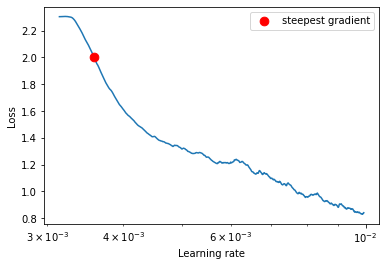

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa9c39ff1d0>,
 0.0035751503006012024)

In [14]:
lr_finder.plot()

### Run Model

In [17]:
train_losses, test_losses, train_acc, test_acc = run_model(train_loader, test_loader, model=ResNet(), epochs=24, device, max_at_epoch=5, param_dict):

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.8307976722717285 Batch_id=97 Accuracy=26.07: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 3953/10000 (39.53%)

EPOCH: 1


Loss=1.3428484201431274 Batch_id=97 Accuracy=43.16: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 5201/10000 (52.01%)

EPOCH: 2


Loss=1.2525984048843384 Batch_id=97 Accuracy=52.74: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 6182/10000 (61.82%)

EPOCH: 3


Loss=1.0217311382293701 Batch_id=97 Accuracy=59.02: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 6814/10000 (68.14%)

EPOCH: 4


Loss=0.9774158000946045 Batch_id=97 Accuracy=64.52: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 7172/10000 (71.72%)

EPOCH: 5


Loss=0.863759458065033 Batch_id=97 Accuracy=68.14: 100%|██████████| 98/98 [00:28<00:00,  3.46it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 7389/10000 (73.89%)

EPOCH: 6


Loss=0.7533721923828125 Batch_id=97 Accuracy=70.07: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0013, Accuracy: 7799/10000 (77.99%)

EPOCH: 7


Loss=0.7743093371391296 Batch_id=97 Accuracy=73.65: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8002/10000 (80.02%)

EPOCH: 8


Loss=0.7397239804267883 Batch_id=97 Accuracy=75.30: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0012, Accuracy: 8007/10000 (80.07%)

EPOCH: 9


Loss=0.7141108512878418 Batch_id=97 Accuracy=76.27: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8135/10000 (81.35%)

EPOCH: 10


Loss=0.6072972416877747 Batch_id=97 Accuracy=77.53: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0011, Accuracy: 8206/10000 (82.06%)

EPOCH: 11


Loss=0.6641201376914978 Batch_id=97 Accuracy=79.61: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8353/10000 (83.53%)

EPOCH: 12


Loss=0.5957667827606201 Batch_id=97 Accuracy=80.37: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8313/10000 (83.13%)

EPOCH: 13


Loss=0.5851854085922241 Batch_id=97 Accuracy=80.39: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8314/10000 (83.14%)

EPOCH: 14


Loss=0.5862736701965332 Batch_id=97 Accuracy=82.30: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8410/10000 (84.10%)

EPOCH: 15


Loss=0.46767184138298035 Batch_id=97 Accuracy=82.23: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0010, Accuracy: 8381/10000 (83.81%)

EPOCH: 16


Loss=0.45263028144836426 Batch_id=97 Accuracy=82.96: 100%|██████████| 98/98 [00:29<00:00,  3.36it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8532/10000 (85.32%)

EPOCH: 17


Loss=0.4469684064388275 Batch_id=97 Accuracy=83.73: 100%|██████████| 98/98 [00:28<00:00,  3.41it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0009, Accuracy: 8540/10000 (85.40%)

EPOCH: 18


Loss=0.4344910681247711 Batch_id=97 Accuracy=84.10: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8678/10000 (86.78%)

EPOCH: 19


Loss=0.4203657805919647 Batch_id=97 Accuracy=85.63: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8716/10000 (87.16%)

EPOCH: 20


Loss=0.457254558801651 Batch_id=97 Accuracy=86.08: 100%|██████████| 98/98 [00:28<00:00,  3.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8751/10000 (87.51%)

EPOCH: 21


Loss=0.41286978125572205 Batch_id=97 Accuracy=86.06: 100%|██████████| 98/98 [00:28<00:00,  3.40it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8722/10000 (87.22%)

EPOCH: 22


Loss=0.3912380635738373 Batch_id=97 Accuracy=86.43: 100%|██████████| 98/98 [00:29<00:00,  3.37it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0008, Accuracy: 8701/10000 (87.01%)

EPOCH: 23


Loss=0.4123222827911377 Batch_id=97 Accuracy=86.81: 100%|██████████| 98/98 [00:28<00:00,  3.39it/s]



Test set: Average loss: 0.0009, Accuracy: 8563/10000 (85.63%)



### Accuracy & Loss plot

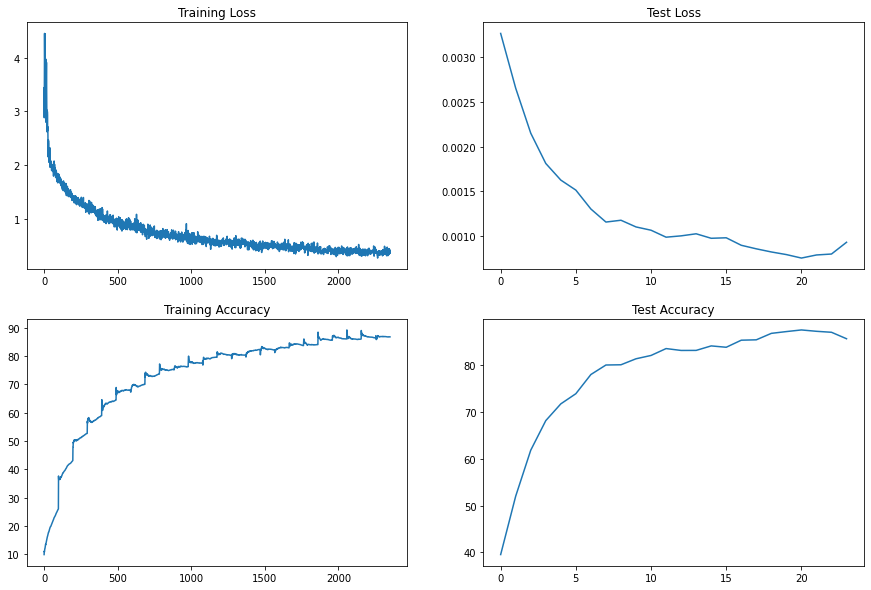

In [18]:
utils.plot_acc_loss(train_losses, train_acc, test_losses, test_acc)

### Misclassified images

Files already downloaded and verified


100%|██████████| 5/5 [00:21<00:00,  4.31s/it]

cuda



/content/vision_wrapper/utils.py:330: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mean_norm = torch.tensor(mean).reshape(1, 3, 1, 1)
/content/vision_wrapper/utils.py:331: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  std_norm = torch.tensor(std).reshape(1, 3, 1, 1)


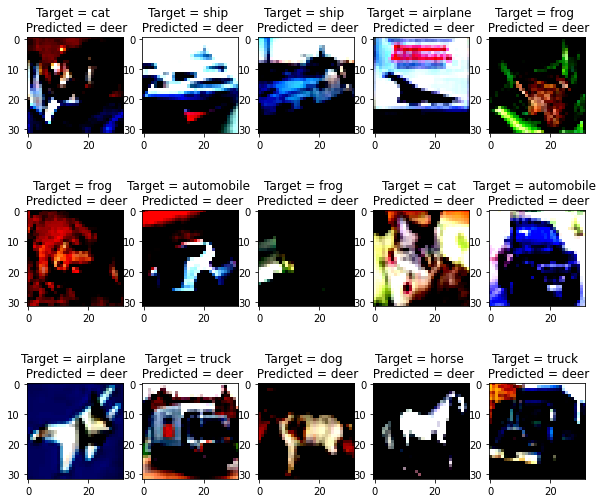

In [20]:
utils.misclassified_images(ResNet(), trainset.classes, test_transform, trainset, testset)